## Experiment with a CNN

- [ ] If experiment goes well, add data to repository


1. Get one input from test set
    1. Get random input
    2. Show input
2. Get model
3. Inference with model using the random input
4. return prediction

In [2]:
cd D:/guided-retraining/utils/

D:\guided-retraining\utils


In [93]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
import utils_guided_retraining2 as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "fashion"

In [6]:
x_test,y_test = utils.get_data(dataset,"Test",True)
x_test,y_test = utils.get_data(dataset,"Train",True)

D:/guided-retraining/data/fashion/x_test.npy
x_set len:  7001
D:/guided-retraining/data/fashion/y_test.npy
y_set len:  7001
D:/guided-retraining/data/fashion/x_train.npy
x_set len:  48999
D:/guided-retraining/data/fashion/y_train.npy
y_set len:  48999


In [7]:
model_dir = "D:/guided-retraining/"
if(dataset == 'gtsrb'):
    model_dir += "models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir += "models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir += "models/models2"
elif(dataset == 'cifar'):
    model_dir += "models/model_02"
elif(dataset == 'fashion'):
    model_dir += "models/model_fashion_2"


print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

D:/guided-retraining/models/model_fashion_2
D:/guided-retraining/models/model_fashion_2
Model loaded correctly


In [87]:
dataset = "fashion"
model_original = utils.My_model(dataset,True, f"D:/GAISSA/deploy-GAISSA/models/model_{dataset}.h5")

D:/GAISSA/deploy-GAISSA/models/model_fashion.h5
Model loaded correctly


In [88]:
model_original.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [89]:
model_original.evaluate(x_test, y_test)

1532/1532 [==============================] - 15s 9ms/step - loss: 0.1722 - accuracy: 0.9354


[0.17219306528568268, 0.9353864192962646]

In [90]:
img_width,img_height  = model_original.sizes
print(model_original.sizes)
classes=model_original.num_classes

(28, 28)


In [91]:
def see_x_image(x,y,name=None,caption=True, save_dir="."):
    '''# (48,48,1) show image, y - (43,)
    '''
    plt.figure()
    
    plt.imshow((x.reshape((img_width,img_height))*255).astype("uint8"))
    title=str(np.argmax(y))
    if name:
        title += " "+name
        plt.title(title)
    if caption:
        plt.title(title)
    print(save_dir)
    plt.savefig(save_dir+"/"+dataset+"_image"+ ".png")
    plt.axis("off")
    

In [24]:

print(model_original.evaluate(x_test[i:i+1],y_test[i:i+1]))
#print(model_original.model.predict(numpy_raw_test_fgsm[i:i+1]))
correct_label =  y_test[i]
cat_correct_label = list(correct_label).index(max(correct_label))
print("Correct class: ",correct_label,", ",cat_correct_label)

pred = tf.keras.utils.to_categorical(np.argmax(model_original.model.predict(x_test[i:i+1])), classes)
cat_pred = list(pred).index(max(pred))
print("Prediction: ",pred, ", ",cat_pred)



1/1 [==============================] - 0s 23ms/step - loss: 0.5139 - accuracy: 1.0000
[0.5139122605323792, 1.0]
Correct class:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ,  2
Prediction:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ,  2


In [92]:
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


In [30]:
label_names[0]

'T-shirt/top'

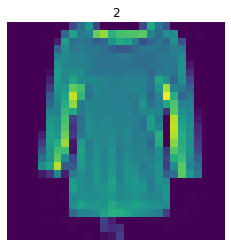

In [25]:
see_x_image(x_test[i],y_test[i])

In [36]:
classes = model_original.num_classes
wrong = []
for i in range(20):
    print(model_original.evaluate(x_test[i:i+1],y_test[i:i+1]))
    #print(model_original.model.predict(numpy_raw_test_fgsm[i:i+1]))
    correct_label =  y_test[i]
    cat_correct_label = list(correct_label).index(max(correct_label))
    print("Correct class: ",correct_label,", ",cat_correct_label)
    print("Correct clothes: ", label_names[cat_correct_label])
    
    pred = tf.keras.utils.to_categorical(np.argmax(model_original.model.predict(x_test[i:i+1])), classes)
    cat_pred = list(pred).index(max(pred))
    print("Prediction: ",pred, ", ",cat_pred)
    print("Prediction clothes: ", label_names[cat_pred])
    
    
    if(cat_correct_label != cat_pred):
        print("Misclassified!")
        wrong.append(i)
print(wrong)

1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]
Correct class:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] ,  1
Correct clothes:  Trouser
Prediction:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] ,  1
Prediction clothes:  Trouser
1/1 [==============================] - 0s 21ms/step - loss: 0.0075 - accuracy: 1.0000
[0.00753359217196703, 1.0]
Correct class:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ,  2
Correct clothes:  Pullover
Prediction:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ,  2
Prediction clothes:  Pullover
1/1 [==============================] - 0s 20ms/step - loss: 0.5139 - accuracy: 1.0000
[0.5139122605323792, 1.0]
Correct class:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ,  2
Correct clothes:  Pullover
Prediction:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ,  2
Prediction clothes:  Pullover
1/1 [==============================] - 0s 20ms/step - loss: 1.0745 - accuracy: 0.0000e+00
[1.0745042562484741, 0.0]
Correct class:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] ,  6
Correct clothes:  Shirt
Pre

3
9


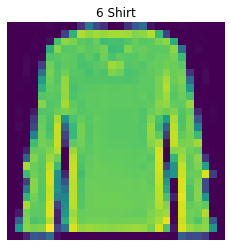

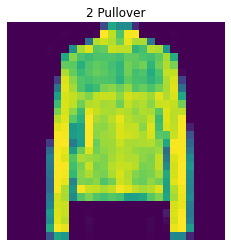

In [42]:

for i in wrong:
    print(i)
    see_x_image(x_test[i],y_test[i],label_names[list(y_test[i]).index(max(y_test[i]))])

In [58]:


def get_random_image(x,y):
    ran = random.randint(0, len(x))
    return x[ran],y[ran]

In [59]:
image,label = get_random_image(x_test,y_test)

In [83]:
pwd

'D:\\guided-retraining\\utils'

In [106]:
ran = random.randint(0, len(x_test))
label_name = label_names[list(y_test[ran]).index(max(y_test[ran]))]

D:/GAISSA/deploy-GAISSA/scripts/


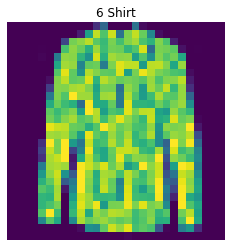

In [96]:
# Get random number between 0 and len(x_test)
ran = random.randint(0, len(x_test))
see_x_image(x_test[ran],y_test[ran],label_names[list(y_test[ran]).index(max(y_test[ran]))],save_dir="D:/GAISSA/deploy-GAISSA/scripts/")

In [97]:
image.shape

(28, 28, 1)

In [98]:
# Inference
# predict with that random
pred = tf.keras.utils.to_categorical(np.argmax(model_original.model.predict(x_test[ran:ran+1])), classes)
cat_pred = list(pred).index(max(pred))
print("Prediction: ",pred, ", ",cat_pred)
print("Prediction clothes: ", label_names[cat_pred])

Prediction:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] ,  6
Prediction clothes:  Shirt


In [100]:
import tensorflow.keras as keras

In [101]:


fashion_mnist=keras.datasets.fashion_mnist

In [102]:
(_, _), (test_X, test_y) = fashion_mnist.load_data()

In [105]:
assert len(test_X) == 10000
assert len(test_y) == 10000